<a href="https://colab.research.google.com/github/ferreiramar96/Churn-Prediction-Telecomunicacoes/blob/main/Churn_Prediction_para_Empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction - Empresa de Telecomunicações

*Churn rate*, ou simplesmente *churn* que também conhecido como rotatividade de clientes, refere-se à taxa em que os clientes deixam de fazer negócios com uma empresa, ou cancelam sua assinatura/serviços como Netflix ou Spotify. É um indicador crítico para muitas empresas, pois a rotatividade de clientes pode afetar negativamente a receita e o crescimento. Quando alguém decide cancelar um serviço, deixar de fazer compras ou trocar para um concorrente, isso é considerado churn.

O churn pode ser causado por vários fatores, como insatisfação com o serviço, falta de valor percebido, preço alto, concorrência, mudança nas necessidades do cliente, entre outros. Compreender os motivos do churn é essencial para as empresas, pois isso permite que elas adotem estratégias para reter clientes existentes e minimizar a perda de receita.

Em resumo, churn é a taxa em que os clientes deixam de fazer negócios ou cancelam serviços, e é um importante indicador de sucesso e crescimento para as empresas. O gerenciamento eficaz do churn é fundamental para manter a base de clientes e impulsionar o crescimento sustentável do negócio.

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Churn-Prediction-Telecomunicacoes/main/Churn_Prediction_Capa.jpeg" width="88%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado. Para prever o churn e tomar medidas preventivas, muitas empresas utilizam técnicas de análise de dados e modelos de machine learning. Eles analisam os dados históricos dos clientes, identificam padrões e características que indicam a probabilidade de churn e, com base nessas informações, implementam ações para reter os clientes em risco.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Objetivos do Projeto

O objetivo do projeto é reduzir a rotatividade de clientes, ou seja, diminuir a taxa em que os clientes cancelam ou encerram seus serviços. O churn é um desafio significativo para empresas desse setor, pois a perda de clientes afeta diretamente a receita e a rentabilidade. Tem como objetivo principal entender os fatores que contribuem para o cancelamento dos serviços pelos clientes, e a partir disso a empresa poderá desenvolver estratégias eficazes para reter os clientes em risco de churn.
<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Churn-Prediction-Telecomunicacoes/main/Costumer_Churn.png" width="75%"></p>

Aqui estão alguns objetivos-chave desse projeto:

* Desenvolver modelos de machine learning e técnicas de análise de dados para prever com precisão quais clientes estão mais propensos a cancelar seus serviços. Isso envolve a análise de dados históricos e a identificação de padrões e características que indicam a probabilidade de churn.

* Determinar os principais fatores que contribuem para o churn dos clientes. Isso pode envolver a análise de variáveis e características específicas, como satisfação do cliente, comportamento de uso, histórico de pagamento, entre outros, para identificar os impulsionadores do churn.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, a seguir vamos ver os nomes das colunas e o que cada uma significa, permitindo um entendimento a respeito do problema.

In [18]:
#Intalado pacotes
#!pip install catboost

In [19]:
#Importando warnings filter
import warnings
# ignore all future warnings
warnings.filterwarnings('ignore')

#Importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler

#Importando os modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Definindo um Seed
np.random.seed(40)

In [ ]:
#Importando os dados
dados = "https://raw.githubusercontent.com/ferreiramar96/Churn-Prediction-Telecomunicacoes/main/data/Telco_Customer_Churn.csv"
df = pd.read_csv(dados)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Acima podemos visualizar as 5 primeiras linhas do nosso conjunto de dados. Porém isso ainda não nos diz muita coisa, pois não sabemos o que cada coluna significa, então irei criar um dicionário de variáveis para podermos entender o que cada um representa.

## Dicionário de Váriaveis

* `customerID` - ID único que identifica cada cliente
* `gender` - Gênero do cliente
* `SeniorCitizen` - Indica se o Cliente tem 65 anos ou mais
* `Partner` - Indica se o Cliente tem um parceiro ou um cônjuge
* `Dependents` - Indica se o Cliente possui ou não dependentes
* `tenure` - Tempo de contrato do cliente com a empresa em Meses
* `PhoneService` - Indica se o Cliente assina serviço Telefônico
* `MultipleLines` - Indica se o Cliente assina multiplas linhas Telefônicas
* `InternetService` - Indica se o Cliente assina serviço de Internet
* `OnlineSecurity` - Indica se o Cliente assina serviço adicional de Segurança Online
* `OnlineBackup` - Indica se o Cliente assina serviço adicional de Backup Online
* `DeviceProtection` - Indica se o Cliente assina serviço adicional de Preteção de Dispositivo para o Equipamento de Internet
* `TechSupport` - Indica se o Cliente assina serviço adicional de Suporte Técnico
* `StreamingTV` - Se o cliente usa a Internet para Programas de TV de terceiros
* `StreamingMovies` - Se o cliente usa a Internet para Programas de Filmes de terceiros
* `Contract` - Indica o tipo atual de Contrato do cliente
* `PaperlessBilling` - Se o cliente optou por receber Faturas e Documentos de forma Eletrônica
* `PaymentMethod` - Qual a forma de pagamento
* `MonthlyCharges` - Cobrança mensal de todos os serviços por mês
* `TotalCharges` - Cobrança total do cliente
* `Churn` - Se o cliente deu Churn ou não
<br><br>
Agora que já sabemos o que cada variável significa, podemos verificar qual o tamanho de nosso Dataset e descobriremos que existem 7043 Entradas e 21 Variáveis:

In [21]:
print(f'Total de Linhas: \t{df.shape[0]}')
print(f'Total de Colunas: \t{df.shape[1]}')

Total de Linhas: 	7043
Total de Colunas: 	21


## Análise Exploratória

A análise exploratória de dados é o processo de investigação e compreensão dos dados por meio de estatísticas descritivas, visualizações e técnicas de resumo. Seu objetivo é identificar padrões, tendências, relações e insights iniciais que ajudem a orientar a modelagem e a tomada de decisões informadas.

Vejamos algumas análises iniciais

In [22]:
#Descobrindo os tipos das Variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
#Quantidade de dados ausentes
print(f'Total de valores ausentes: {df.isnull().sum().values.sum()}')

Total de valores ausentes: 0


In [24]:
#Valores unicos por coluna
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [25]:
#Porcentagem de valores ausentes
df.isnull().sum()/df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Observando as saídas acima, podemos chegar a algumas conclusões:

* A coluna `TotalCharges` deveria ser do `float`, porém ela está como `string`.
  * Logo a seguir iremos ver, apesar de não termos detectado nenhum valor ausente, existem algumas strings que possuem sim valores ausentes.

* A coluna `customerID` não agrega nenhuma informação, pois ela se trata apenas de uma identificação para cada cliente.

* Existem muitas variáveis binárias e multiclasses, que mais para frente serão codificadas para valores numéricos, para utilizarmos alguns modelos de Machine Learning.

* Nossa variável alvo é `Churn`, representando a situação de Churn.

Voltando a nossa variável `TotalCharges` para identificarmos os dados ausentes...
Podemos descobri-los da seguinte forma:

In [26]:
#Convertendo a coluna TotalCharges para float
#df['TotalCharges'].astype('float32')

O código acima é para convertermos para o tipo float, porem se rodarmos o código acima ele gerará o seguinte erro: `ValueError: could not convert string to float: ' '`. O que provavelmente aconteceu, foi que quando alguém foi preencher os dados acabou colocando esse `""`.

Criarei uma função para conseguir converter adequadamente os valores de string para float, e os valores `""` encontrados serão convertidos em NaN e posteriormente serão substituidos pela `Mediana` da coluna `TotalCharges`

Já irei também aproveitar para excluir a coluna `CustomerID`, que será desnecessára neste projeto. Mas caso ainda precise, irei fazer uma cópia dos nossos dados

In [27]:
#Criando a função
def converter_str_float(entrada):
    try:
        return float(entrada)
    except ValueError:
        return np.nan

#Criando uma cópia dos dados
df_clean = df.copy()

#Removendo a coluna CustomerID
df_clean.drop(columns="customerID", inplace=True)

#Aplicando a função em TotalCharge
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(converter_str_float)

#Verificando se existem valores ausentes novamente
print(f"Valores ausentes(Antes da Transformação): {df_clean['TotalCharges'].isnull().sum()}")

#Completando os dados ausentes com a Mediana
TotalChargesMediana = df_clean['TotalCharges'].median()
df_clean['TotalCharges'].fillna(TotalChargesMediana, inplace=True)

#Verificando se ainda existe valor ausente
print(f"Valores ausentes(Depois da Transformação): {df_clean['TotalCharges'].isnull().sum()}")

Valores ausentes(Antes da Transformação): 11
Valores ausentes(Depois da Transformação): 0


Apesar de existirem muitas variáveis categórica, com essas alterações feitas acima, já podemos ver algumas informações estatísticas. E assim podermos ver se em nosso conjunto de dados possui valores outliers. Irei utilizar a função `describe`.

In [28]:
#Estatistica dos dados
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Abaixo irei criar um gráfico de dispersão e alguns boxplots para tentarmos encontrar algum anomalia nos dados, como por exemplo valores outliers. E a partir dai, tomarmos alguma providencia.

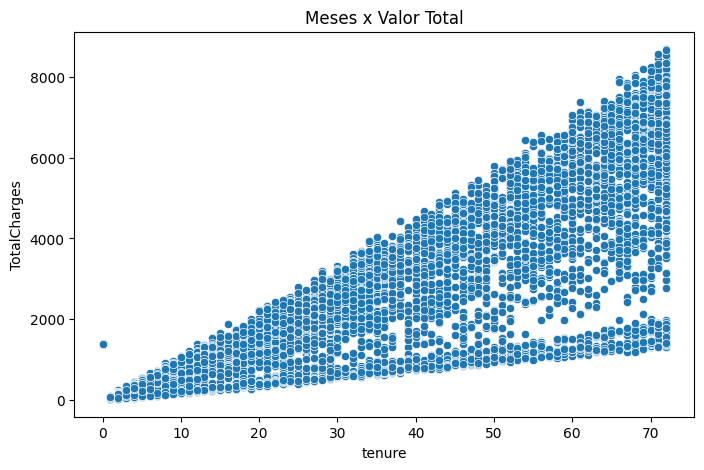

In [29]:
#Construindo o ScatterPlot
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='tenure', y='TotalCharges')
ax.set_title("Meses x Valor Total")
plt.show()

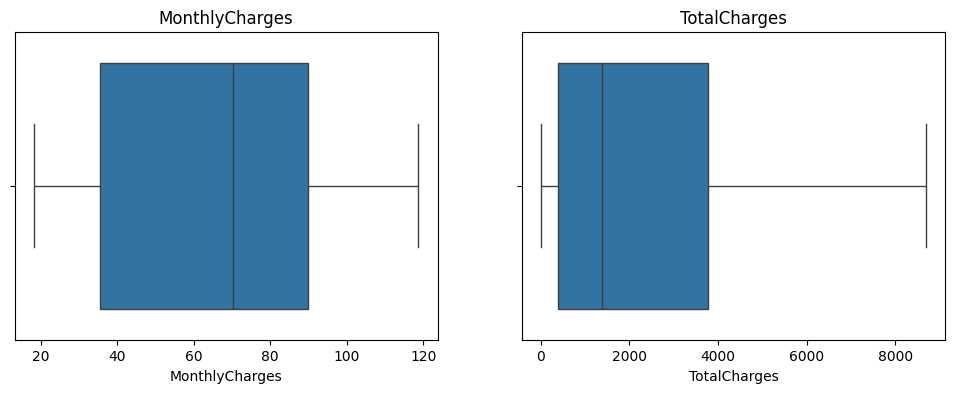

In [30]:
#Construindo o BoxPlot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0], orient='h')
sns.boxplot(df_clean['TotalCharges'], ax=ax[1], orient='h')
ax[0].set_title('MonthlyCharges')
ax[1].set_title('TotalCharges')
plt.show()

No primeiro gráfico fiz uma relação entre as variáveis `tenure` e `TotalCharges`, mas não foi identificando nada fora do padrão.

Já no segundo gráfico, também não foi identificado nenhum valor outlier, para ser considerado um valor discrepante ele teria que estar fora dos limites superior e inferior, porém nada foi detectado.

Logo em seguida, irei plotar um gráfico que mostra quantos clientes assinam a tanto tempo(tenure), e lembrando que os valores são em meses.

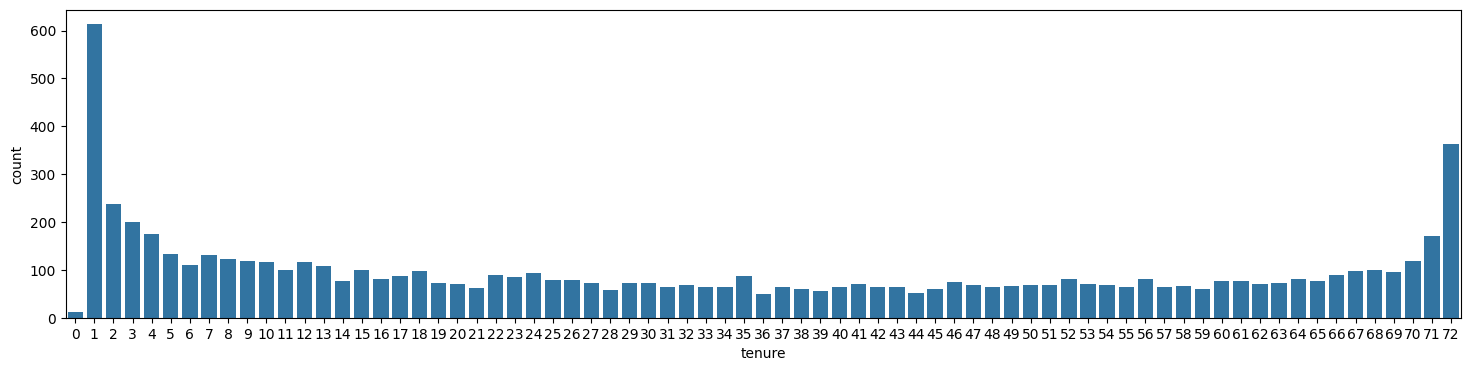

In [31]:
#Construindo o Histograma
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df_clean, x='tenure')
plt.show()

Podemos ver que a quantidade de meses que mais retém os clientes, são os 5 primeiros meses e os 3 utlimos meses. Sendo que o mês 72 é o ultimo número de meses em nosso dataset e 2º maior mês de retenção dos clientes, então talvez se houvesse mais alguns meses seria possível identificar mais padrões, fazendo com que o modelo de Machine Learning seja mais preciso.

----------------------------------------------------------

Agora falando sobre `variáveis categóricas`, é importante ver os valores únicos. Isso permite identificar situações como labels diferentes querendo indicar a mesma coisa.

Vendo os valores impressos na célula abaixo, entendo que um cientista de dados assim como eu, possa querer considerar valores como `No`, `No phone service` e `No internet service` como sendo a mesma coisa.

Isso ocorre nas seguintes colunas: `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`. Aplicando essa alteração, iremos ter mais 7 colunas binárias, o que significa que mais para frente ficará muito mais fácil para podermos trabalhar com essas variáveis. Identificado onde serão feitas as mudanças, hora de colocar a mão na massa.

In [32]:
#Verificar valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

In [33]:
#Criando a lista com as colunas de 'No internet service'
no_internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#Aplicando as alterações
for col in no_internet_services:
  df_clean[col].replace('No internet service', 'No', inplace=True)

df_clean['MultipleLines'].replace('No phone service', 'No', inplace=True)

#Verificando novamente os valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'One year', 'Two year', 'Yes'],
      dtype=object)

O próximo passo que iremos dar será identificar se os nossos dados podem estar com algum tipo de bias (viés), irei verificar a contagem de valores para `Male` e `Female`.

Apesar de não entender que isso poderia gerar algum prejuízo relevante neste problema específico, haverá muitas situações onde esse prejuízo será real, como é o caso de modelos aplicados à contratação de funcionários ou previsão de crimes.

E tambem irei ver como está a distribuição dos nossos dados de `Churn`.

Dados de Gênero: 
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------
Dados de Churn: 
Churn
No     5174
Yes    1869
Name: count, dtype: int64


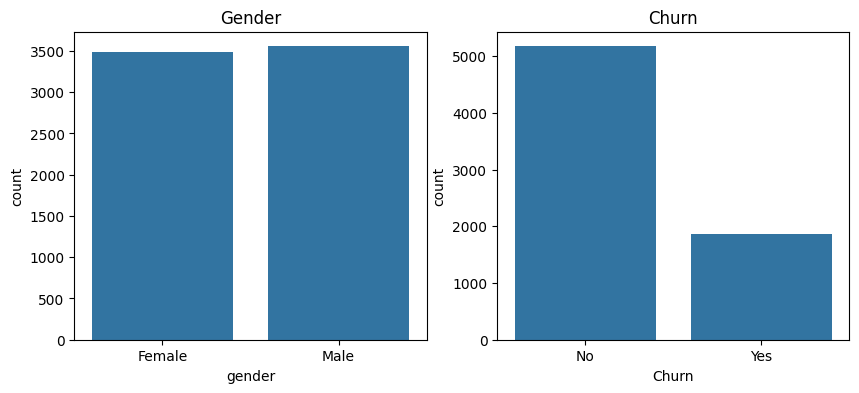

In [34]:
#Construindo o CountPlot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

print(f'Dados de Gênero: \n{df_clean.gender.value_counts()}')
print("----------------------------------")
print(f'Dados de Churn: \n{df_clean.Churn.value_counts()}')

sns.countplot(data=df_clean, x='gender', ax=ax[0])
sns.countplot(data=df_clean, x='Churn', ax=ax[1])
ax[0].set_title('Gender')
ax[1].set_title('Churn')
plt.show()

É possível identificar que para os dados de `Churn`a classe `No` ocorre com frequência muito superior à classe `Yes`. Isso será considerado na etapa de pré-processamento, pois na parte de construção do modelo de machine learning, esse desbalanceamento terá uma grande influência nos resultados do modelo.

Já para os dados de `Gender` estão balanceados de forma quase igual, não será nescessário fazer o balanceamento das classes.

Agora vamos ver a correlação entre as variaveis numéricas para identificarmos possíveis relações. Irei utilizar as seguintes variáveis: `Tenure`, `MonthlyCharges`, `TotalCharges`.

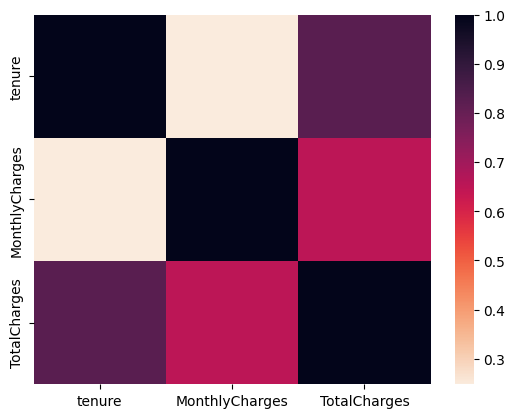

In [35]:
#Construindo a Matriz de Correlação
df_corr = df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(df_corr, cmap='rocket_r')
plt.show()

Observando nossa matriz de correlação acima, é possível ver que há uma **forte** correlação entre as variáveis "Tenure" e "TotalCharge", e uma correlação **fraca** entre "Tenure" e "MonthlyCharges".

Por fim, nesta primeira parte de análise exploratória, irei verificar qual a taxa em porcentagem de `Churn` pelos valores das colunas: `PaymentMethod` e `Contract`. Pois com essas análises, podemos ter uma noção de quais mais têm influência sobre os Churns.

In [36]:
#Agrupando por cada coluna o Churn, e calculando a porcentagem de cada um
grupo_pagamento = (df_clean.groupby(['PaymentMethod', 'Churn'])['Churn'].count()/df_clean.shape[0]*100).round(2)
grupo_contrato = (df_clean.groupby(['Contract', 'Churn'])['Churn'].count()/df_clean.shape[0]*100).round(2)

print("Taxa de Churn por Forma de Pagamento:\n")
print(grupo_pagamento)
print("--------------------------------------------\n")
print("Taxa de Churn por Tipo de Contrato:\n")
print(grupo_contrato)

Taxa de Churn por Forma de Pagamento:

PaymentMethod              Churn
Bank transfer (automatic)  No       18.26
                           Yes       3.66
Credit card (automatic)    No       18.32
                           Yes       3.29
Electronic check           No       18.37
                           Yes      15.21
Mailed check               No       18.51
                           Yes       4.37
Name: Churn, dtype: float64
--------------------------------------------

Taxa de Churn por Tipo de Contrato:

Contract        Churn
Month-to-month  No       31.52
                Yes      23.50
One year        No       18.56
                Yes       2.36
Two year        No       23.38
                Yes       0.68
Name: Churn, dtype: float64


Com os agrupamentos feitos e com os valores impressos, podemos concluir que:
* Os clientes que pagam por meio **Electronic check**, possuem quase 4x mais chance de cancelarem os serviços do que clientes com outros métodos de pagamento.
* Clientes que possuem a assinatura **Month-to-month**, são responsáveis por 85% das taxas de  cancelamento.

Essas foram algumas análises feitas, e agora estamos prontos para partirmos para a parte de preparação dos dados e logo em seguida para a construção de nossos modelos de Machine Learning.

## Preparação dos Dados

A preparação dos dados para um modelo de machine learning é uma etapa crucial que visa garantir que os dados estejam limpos, estruturados e adequados para a aplicação de algoritmos de aprendizado de máquina ou seja, temos que fornecer dados de qualidade.
<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Churn-Prediction-Telecomunicacoes/main/PreProcess.png" width="60%"></p>


Uma preparação bem-executada contribui significativamente para a eficácia e a precisão do modelo final, permitindo uma análise mais confiável e insights valiosos para a tomada de decisões. Nesta fase, iremos abordar etepas como:

* Codificação de Variáveis
* Feature Engineering
* Feature Scaling
* Feature Selection
* Separação dos dados (Treino e Teste)
* Balanceamento de Classes


#### Codificação de Variáveis

Codificação de variáveis é o processo de transformar variáveis categóricas em representações numéricas adequadas para análise por algoritmos de machine learning. Existem várias técnicas de codificação, como Label Encoding, One-Hot Encoding e Dummies, que mapeiam as categorias para valores numéricos ou criam colunas binárias para cada categoria, respectivamente. A codificação de variáveis é fundamental para garantir que os modelos possam lidar com dados categóricos e obter informações valiosas a partir deles.

Neste problema em questão, irei utilizar o **LabelEncoder** e **get_dummies**. O Label Encoder funciona melhor para variáveis binárias, já o dummies funciona melhor para variáveis categóricas.

In [37]:
#Separando os tipos de variáveis
var_binary = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
var_num = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in var_binary]
var_cat = [col for col in df_clean.columns.tolist() if col not in var_binary + var_num]

#Fazendo outra cópia dos dados
df_cod = df_clean.copy()

#Aplicando a codificação para as variáveis Binárias
le = LabelEncoder()
for i in var_binary:
  df_cod[i] = le.fit_transform(df_cod[i])

#Aplicando a codificação para as variáveis de múltiplas classes
df_cod = pd.get_dummies(df_cod, columns=var_cat)

#Verificando as Entradas
df_cod.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


Com as modficações acima, podemos ver que não existem mais variáveis categóricas, e que a quantidade de colunas do nosso dataset aumentou. Tudo isso por conta da **Codificação**, e um ponto bacana para se comentar é o seguinte: Se na parte de Análise, eu não tivesse feito aquela correção de substituir os valores de algumas colunas que significavam a mesma coisa...esse nosso dataset estaria com mais de 40 colunas. E quanto mais compacto for nossos dados, melhor será o desempenho do nosso modelo de Machine Learning que iremos construir mais a frente.

Codificação feita, podemos partir para a próxima etapa.

#### Feature Engineering

Feature Engineering é o processo de melhorar as características dos dados para torná-los mais adequados e informativos aos modelos de machine learning. Isso inclui a criação de novas variáveis, transformações ou seleções de características existentes para obter melhores insights e desempenho do modelo. O Feature Engineering é fundamental para maximizar a precisão e eficácia dos modelos, garantindo resultados mais confiáveis e valiosos.

In [38]:
#Criando uma Feature de interação entre as variáveis "Charges"
df_cod['InteracaoCharges'] = df_cod['MonthlyCharges'] * df_cod['TotalCharges']

In [39]:
#Agrupando as variáveis de "internet"
internet = df_cod['InternetService_DSL'] + df_cod['InternetService_Fiber optic'] + df_cod['InternetService_No']

#Criando uma Feature de Engajamento
df_cod['Engajamento'] = df_cod['PhoneService'] + df_cod['MultipleLines'] + internet + df_cod['OnlineSecurity'] + df_cod['OnlineBackup'] + df_cod['DeviceProtection'] + df_cod['TechSupport'] + df_cod['StreamingTV'] + df_cod['StreamingMovies']

Acima criei 2 Features que podem agregar mais valor ao nosso conjunto de dados, logo mais veremos se essas features criadas possuem relevância ou não, para utilizarmos em nossos modelos. As Features criadas foram:

* 1º - Feature interativa, como a **multiplicação de `MonthlyCharges` e `TotalCharges`**, para capturar potenciais efeitos de sinergia entre as variáveis.

* 2º - Feature que representa o engajamento do cliente, como a **soma do número de serviços utilizados** ou a quantidade de alterações de plano nos últimos meses.

Deem uma olhada em como ficou:

In [40]:
df_cod.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InteracaoCharges,Engajamento
0,0,0,1,0,1,0,0,0,1,0,...,False,True,False,False,False,False,True,False,891.0225,2
1,1,0,0,0,34,1,0,1,0,1,...,False,False,True,False,False,False,False,True,107607.0250,4
2,1,0,0,0,2,1,0,1,1,0,...,False,True,False,False,False,False,False,True,5823.8775,4
3,1,0,0,0,45,0,0,1,0,1,...,False,False,True,False,True,False,False,False,77863.7250,4
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,False,False,False,True,False,10721.6550,2


#### Feature Selection

A Feature Selection é um processo de seleção das variáveis mais relevantes e significativas de um conjunto de dados para construir modelos de machine learning mais eficientes. **O objetivo é reduzir a dimensionalidade dos dados, removendo características irrelevantes ou redundantes**, melhorando o desempenho do modelo e evitando overfitting. Existem várias técnicas de Feature Selection, incluindo abordagens baseadas em estatísticas, algoritmos de aprendizado de máquina ou métodos baseados em modelos. A seleção adequada das features pode simplificar a análise, economizar recursos computacionais e facilitar a interpretação dos resultados.

Irei testar 2 métodos:

* SelectKBest - É uma técnica univariada de seleção de features que classifica cada feature individualmente, vamos utilizar a métrica chi-quadrado.

* ExtraTreeClassifier - é um algoritmo de aprendizado de máquina que utiliza as interações entre features para avaliar sua importância.

In [41]:
#Separando os dados para o Feature Selection
X = df_cod.drop('Churn', axis=1)
y = df_cod['Churn']

In [42]:
#Criando um loop, para utilizarmos o SelectKBest
for k in range(10, 20, 5):
  skb = SelectKBest(score_func=chi2, k=k)
  feature = skb.fit_transform(X, y)
  selected_features_namesK = X.columns[skb.get_support()]

  print(f'Número de Features: {k}')
  print(f'{selected_features_namesK}')
  print('---' * 20)

Número de Features: 10
Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InteracaoCharges'],
      dtype='object')
------------------------------------------------------------
Número de Features: 15
Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InteracaoCharges'],
      dtype='object')
------------------------------------------------------------


In [43]:
#Instanciando e treinando o método
model = ExtraTreesClassifier()
model.fit(X, y)

#Obter as importâncias das features
importances = model.feature_importances_

#Criar um DataFrame com as importâncias e os nomes das features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Ordenar as features pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Criando um loop, para utilizarmos o ExtraTreeClassifier
for k in range(10, 20, 5):
  selected_features_namesE = importance_df.head(k)['Feature'].values
  print(f'Número de Features: {k}')
  print(f'{selected_features_namesE}')
  print('---' * 20)

Número de Features: 10
['tenure' 'TotalCharges' 'InteracaoCharges' 'MonthlyCharges'
 'Contract_Month-to-month' 'InternetService_Fiber optic' 'Engajamento'
 'PaymentMethod_Electronic check' 'gender' 'Partner']
------------------------------------------------------------
Número de Features: 15
['tenure' 'TotalCharges' 'InteracaoCharges' 'MonthlyCharges'
 'Contract_Month-to-month' 'InternetService_Fiber optic' 'Engajamento'
 'PaymentMethod_Electronic check' 'gender' 'Partner' 'PaperlessBilling'
 'SeniorCitizen' 'OnlineSecurity' 'OnlineBackup' 'Dependents']
------------------------------------------------------------


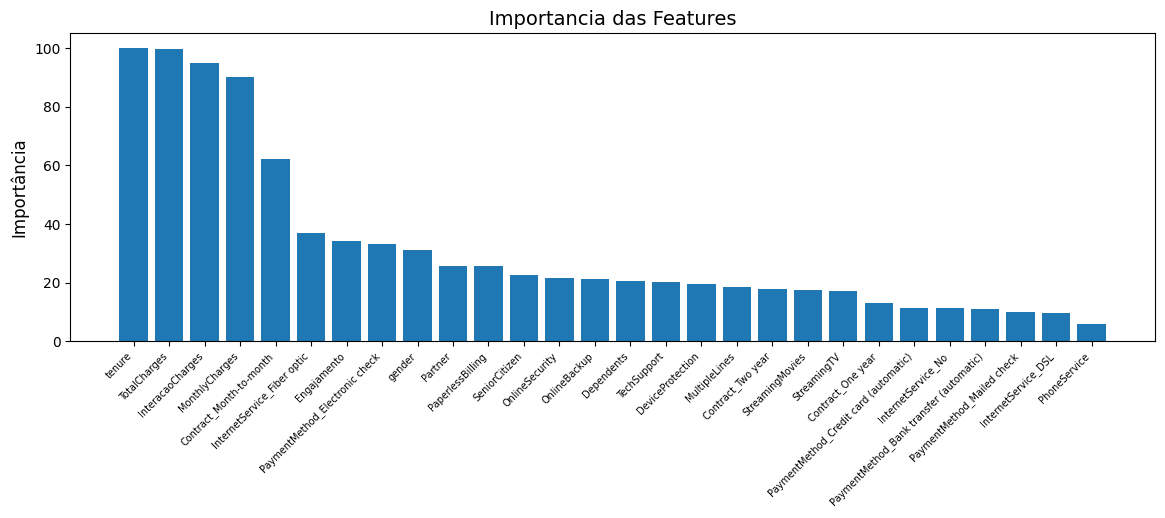

In [44]:
# Calcular a porcentagem de importância de cada feature em relação à maior importância
max_importance = importance_df['Importance'].max()
importance_df['Percentage'] = (importance_df['Importance'] / max_importance) * 100

# Plotar o gráfico de barras com as porcentagens de importância
plt.figure(figsize=(14, 4))
plt.bar(importance_df['Feature'], importance_df['Percentage'])
plt.ylabel('Importância', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.title('Importancia das Features', fontsize=14)
plt.show()

Após aplicar as 2 técnicas de Feature Selection, podemos perceber algumas coisas:

* A seleção das variáveis foram quase as mesmas, tanto no SelectKBest quanto no ExtraTreeClassifier.

* Fiz uma seleção para as 10 e 15 features mais importantes.

* Plotei um gráfico mostrando a ordem de importância das features, que mais influênciam para causar um Churn.

* As variáveis que criei, estão entre as 10 que mais podem influenciar no resultado. A partir daqui, podemos ver importânia da análise crítica e do Feature Engineering.

E por que eu fiz uma seleção para as 10 e 15 mais importantes? Pelo fato de que, irei tester como será a acurácia dos modelos com essas features, e também testarei com todas as features. E dessa forma, a que possuir melhor performance, será a quantidade de variáveis que vou utilizar.

 Agora vamos separar os dados de Treino e Teste para o nosso modelo, lembrando que iremos testar com os grupos de features que selecionei de acordo com sua importância.

#### Separação dos dados (Treino e Teste)

A separação dos dados em treino e teste é a divisão do conjunto de dados em duas partes: uma para treinar o modelo e outra para testá-lo. **O objetivo é avaliar o desempenho do modelo em dados não vistos durante o treinamento**, garantindo sua capacidade de generalização para novas amostras. O conjunto de treinamento é utilizado para ajustar os parâmetros do modelo, enquanto o conjunto de teste é usado para medir o desempenho e verificar se o modelo é eficaz em prever novos resultados.

Irei separar os dados de X em 4 partes, com 10, 15 e todas as features.

In [45]:
#Separando os dados em X e Y
X28 = df_cod.drop('Churn', axis=1)

X10 = df_cod[['tenure', 'MonthlyCharges', 'TotalCharges','InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year','PaymentMethod_Electronic check', 'InteracaoCharges']]

X15 = df_cod[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','TechSupport', 'PaperlessBilling', 'MonthlyCharges',
              'TotalCharges','InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month', 'Contract_One year',
              'Contract_Two year','PaymentMethod_Electronic check', 'InteracaoCharges']]

y = df_cod['Churn'].values.reshape(-1, 1)

In [46]:
#Separando os dados em Treino e Teste por cada subgrupo
x10_train, x10_test, y10_train, y10_test = train_test_split(X10, y, stratify=y, shuffle=True)
x15_train, x15_test, y15_train, y15_test = train_test_split(X15, y, stratify=y, shuffle=True)
x28_train, x28_test, y28_train, y28_test = train_test_split(X28, y, stratify=y, shuffle=True)

Fiz a separação de acordo com a importância de cada Feature, que logo mais iremos testar qual desses subgrupos possuem um maior desempenho, e a partir disso escolher nosso modelo de IA e aperfeiçoa-lo.

Agora irei partir para a parte de Padronização dos dados.

#### Feature Scaling

O Feature Scaling ou Padronização dos Dados é uma técnica de pré-processamento que padroniza as variáveis numéricas, **transformando-as para terem média zero e desvio padrão igual a um**. Essa abordagem é útil para algoritmos sensíveis à escala, garantindo que todas as variáveis tenham a mesma importância no modelo de machine learning. Iremos utilizar o `StandardScaler`, ele é aplicado a cada feature individualmente e não altera a natureza dos dados, preservando sua interpretação original.

No caso, irei utiliza-lo nas seguintes variáveis: `MonthlyCharges`, `TotalCharges` e `InteracaoCharges`

In [47]:
#Instanciando a função
std_scaler = StandardScaler()

#Criando uma cópia dos dados para compararmos
df_std = df_cod.copy()

#Separando as colunas
padronizar = ['MonthlyCharges', 'TotalCharges', 'InteracaoCharges']

#Aplicando a padronização
df_cod[padronizar] = std_scaler.fit_transform(df_cod[padronizar])
x28_train = std_scaler.fit_transform(x28_train)
x28_test = std_scaler.fit_transform(x28_test)
x10_train = std_scaler.fit_transform(x10_train)
x10_test = std_scaler.fit_transform(x10_test)
x15_train = std_scaler.fit_transform(x15_train)
x15_test = std_scaler.fit_transform(x15_test)
#Visualizando os dados
print(f'Dados Não Padronizados:\n\n{df_std[padronizar].head()}')
print('--------------------------------------------------')
print(f'Dados Padronizados:\n\n{df_cod[padronizar].head()}')

Dados Não Padronizados:

   MonthlyCharges  TotalCharges  InteracaoCharges
0           29.85         29.85          891.0225
1           56.95       1889.50       107607.0250
2           53.85        108.15         5823.8775
3           42.30       1840.75        77863.7250
4           70.70        151.65        10721.6550
--------------------------------------------------
Dados Padronizados:

   MonthlyCharges  TotalCharges  InteracaoCharges
0       -1.160323     -0.994242         -0.805537
1       -0.259629     -0.173244         -0.356049
2       -0.362660     -0.959674         -0.784760
3       -0.746535     -0.194766         -0.481328
4        0.197365     -0.940470         -0.764131


Como podemos observar, os valores são sempre alterados para uma escala que se encontra entre 0 e 1. Irei plotar um **gráfico de correlação entre todas as variáveis** para podermos ver se após a codificação e a padronização, é possível identificar novas correlações entre as features

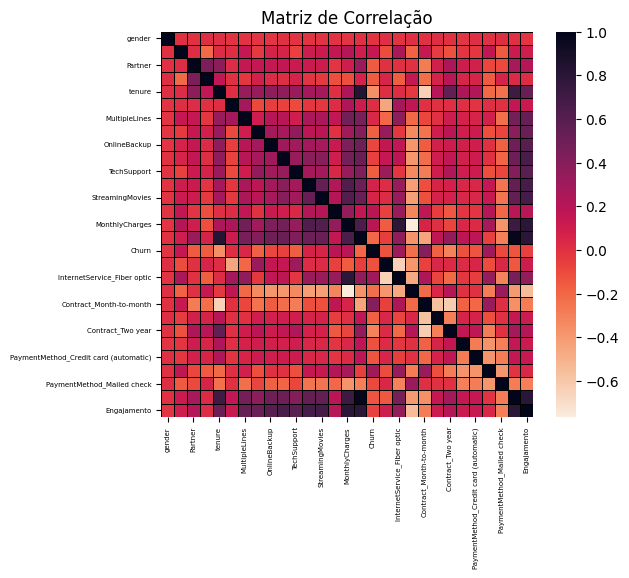

In [48]:
#Obtendo a correlação dos dados
correlacao_geral = df_cod.corr()

#Plotando o gráfico
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(correlacao_geral,  cmap='rocket_r', fmt='.1f', linewidths=0.6, linecolor='black', ax=ax)
ax.set_title('Matriz de Correlação')
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)
plt.show()

Aparentemente, analisando a matriz não é possível identificar muitas correlações entre as variáveis. A seguir, o último passo da parte de Pré-Processamento dos dados: O balanceamento da nossa classe de `Churn`

#### Balanceamento de Classes

Balanceamento de classes é uma técnica de pré-processamento usada em projetos de machine learning para lidar com classes desproporcionalmente representadas nos dados. **O objetivo é igualar o número de amostras em cada classe, evitando que o modelo seja enviesado para a classe majoritária** e melhorando sua capacidade de generalização. As técnicas comuns incluem oversampling (aumentar a classe minoritária) e undersampling (reduzir a classe majoritária).

Irei utilizar a função `RandomUnderSampler()` da biblioteca imblearn.

0
0    1402
1    1402
Name: count, dtype: int64


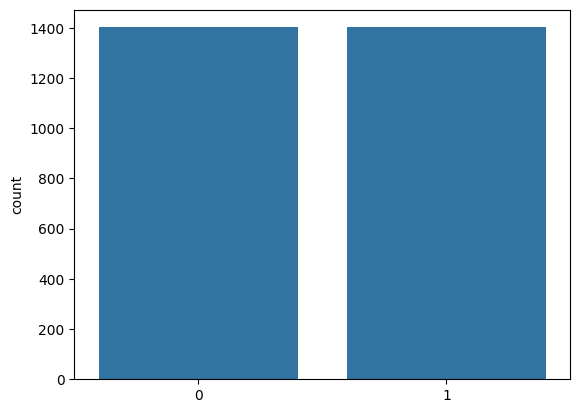

In [49]:
#Instanciando a função
under_sampler = RandomUnderSampler()

#Aplicando a transformação
x28_train_bal, y28_train_bal = under_sampler.fit_resample(x28_train, y28_train)
x10_train_bal, y10_train_bal = under_sampler.fit_resample(x10_train, y10_train)
x15_train_bal, y15_train_bal = under_sampler.fit_resample(x15_train, y15_train)

#Vendo a quantidade dos Churns após o balanceamento
y_value_counts = pd.DataFrame(y28_train_bal.copy())
print(y_value_counts.value_counts())

#Plotando um CountPlot para ver o balanceamento
sns.countplot(x=y28_train_bal)
plt.show()

Com nossos dados finalmente pré-processados, podemos partir para a parte mais esperada que é a parte de Machine Learning.

## Modelos de Machine Learning

Machine learning é um subcampo da inteligência artificial que consiste em desenvolver algoritmos capazes de aprender a partir de dados e melhorar seu desempenho em tarefas específicas ao longo do tempo, sem serem explicitamente programados. Ele se baseia em técnicas estatísticas e computacionais que permitem ao modelo extrair padrões, estruturas e relações relevantes dos dados de treinamento para realizar previsões, classificações, regressões ou outras tarefas em novos dados não vistos anteriormente. Os algoritmos de machine learning podem ser supervisionados, não supervisionados ou semi-supervisionados, dependendo do tipo de informação disponível durante o treinamento. Eles são amplamente utilizados em áreas como processamento de linguagem natural, visão computacional, sistemas de recomendação, análise de dados e automação de tarefas complexas.

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Churn-Prediction-Telecomunicacoes/main/machineLearning.jpg" width="60%"></p>

No projeto de Churn prediction, o machine learning é utilizado para desenvolver um modelo que possa prever a probabilidade de um cliente cancelar (fazer churn) seus serviços de telecomunicações. **O objetivo é desenvolver um modelo preciso e confiável que possa ajudar a empresa a tomar medidas proativas para reter clientes em risco de churn**, melhorar a satisfação do cliente e otimizar suas estratégias de negócios. O processo de machine learning pode envolver a utilização de diversos algoritmos, técnicas de feature engineering, seleção de features e ajuste de hiperparâmetros para criar o melhor modelo possível para o problema específico de churn.

Para esse projeto irei testar os seguintes algoritmos:
* Logistic Regression
* Gradient Descent
* Suport Vector Machine(SVM)
* Decision Tree
* Random Forest
* K-Nearest Neighbors(KNN)
* XGBoost
* LightGBM
* CatBoost

E a partir desses modelos, irei pegar o recall de cada um aplicando os dados em subgrupos. Irei escolher os 3 modelos que apresentarem um reccall maior, para a partir dai eu poder tuna-los e alterar seus hyperparâmetros e obter a melhor performance possível para um resultado final.

Irei utilizar uma técnica muito utilizada em Machine Learning, para testar as combinações de dados:

* Validação Cruzada: É uma técnica utilizada para avaliar o desempenho de um modelo de forma mais confiável e robusta. Ela consiste em dividir o conjunto de dados em várias partes, chamadas de folds, e treinar o modelo em diferentes combinações de folds, alternando entre dados de treinamento e teste. Isso permite que o modelo seja avaliado em diferentes subconjuntos de dados, reduzindo o risco de overfitting ou underfitting.

Vamos colocar em prática:

In [50]:
#Instanciando os modelos
lr = LogisticRegression()
sgdc = SGDClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
lg = LGBMClassifier()
cat = CatBoostClassifier(verbose=0)

#Criando uma função para aplicar a Validação Cruzada
def val_model(X, y, clf, quite=False):
    pipeline = make_pipeline(clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    return scores.mean()

In [51]:
#Criando as listas para armazenar o nome dos modelos e os recalls
recall28 = []
recall10 = []
recall15 = []
nomesModels = []

#Pegando o Recall de cada modelo
for model in (lr, sgdc, svm, dt, rf, knn, xgb, lg, cat):
  recall28.append(val_model(x28_train_bal, y28_train_bal, model))
  recall10.append(val_model(x10_train_bal, y10_train_bal, model))
  recall15.append(val_model(x15_train_bal, y15_train_bal, model))
  nomesModels.append(model.__class__.__name__)

[LightGBM] [Info] Number of positive: 1122, number of negative: 1121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500223 -> initscore=0.000892
[LightGBM] [Info] Start training from score 0.000892
[LightGBM] [Info] Number of positive: 1122, number of negative: 1121
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500223 -> initscore=0.000892
[LightGBM] [I

In [52]:
#Criando um Dataframe para os recalls em cada modelo e cada subconjunto de Features
recalls = pd.DataFrame(data={"Recall_10": recall10, "Recall_15": recall15,
                             "Recall_28": recall28}, index=nomesModels)
recalls

,Recall_10,Recall_15,Recall_28
LogisticRegression,0.800991,0.805241,0.813185
SGDClassifier,0.788894,0.823073,0.780374
SVC,0.796002,0.799548,0.791060
DecisionTreeClassifier,0.675478,0.684024,0.691912
RandomForestClassifier,0.724675,0.753198,0.761823
KNeighborsClassifier,0.751777,0.768170,0.788172
XGBClassifier,0.735391,0.757473,0.748983
LGBMClassifier,0.756741,0.779586,0.772524
CatBoostClassifier,0.784565,0.802389,0.797473


Observando nossa tabela acima é possível ver que os **melhores recalls** variam de acordo com a quantidade de features e com qual modelo ele é aplicado, então irei testar de acordo com o desempenho acima das variáveis. E também irei escolher 4 modelos, e a partir disso irei tunar os hyperparâmetros desses modelos para obtermos o melhor resultado possível.

Os modelos serão: `Logistic Regression`, `XGBoost`, `CatBoost` e `LightGBM`

## Tunagem dos Hyperparâmetros

Também conhecido como busca de hiperparâmetros, é um processo importante na construção de modelos de machine learning. Os hiperparâmetros são valores ajustáveis que controlam o comportamento e desempenho do modelo. A tunagem envolve encontrar a combinação ideal de hiperparâmetros que otimizam o desempenho do modelo em relação a uma métrica específica, como acurácia, precisão ou recall. Existem diversas técnicas para realizar a tunagem, incluindo Grid Search, Random Search e Otimização Bayesiana.

Irei utilizar o **Grid Search**

#### Regressão Logística

Os seguintes parâmetros serão tunados:

* **C** - Controla a força da penalidade aplicada aos coeficientes do modelo. Valores menores de C aumentam a força da regularização, o que pode ajudar a evitar o overfitting, enquanto valores maiores de C reduzem a regularização, permitindo que o modelo se ajuste mais aos dados de treinamento.

* **Solver** - O algoritmo utilizado para otimizar a função de custo. A escolha do solver pode afetar a velocidade de treinamento e a precisão do modelo, dependendo do tamanho do conjunto de dados e da natureza do problema.

* **Max_iter** - O número máximo de iterações permitidas para o otimizador convergir para a solução. Se o otimizador não convergir antes do limite máximo de iterações, pode ser necessário aumentar esse valor.

In [53]:
lr = LogisticRegression()

#Pegando os hyperparâmetros que serão passados para o Grid Search
param_grid = {
 'C': [0.1, 1, 5, 10],
 'solver': ['liblinear', 'lbfgs', 'saga'],
 'max_iter': range(10, 110, 10)
}

# identificar melhor parâmetro
grid_search = GridSearchCV(lr, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

# ver resultados
print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, lr)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.813 %
Após o ajuste: 0.814 % para {'C': 5, 'max_iter': 20, 'solver': 'lbfgs'}


Apesar de não termos conseguido quase nada de desempenho melhor, vamos utilizar os hyperparâmetros que conseguimos.

Agora vamos montar o modelo final, utilizando nossos dados de teste.

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1294
           1       0.50      0.80      0.62       467

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761

AUC: 0.758



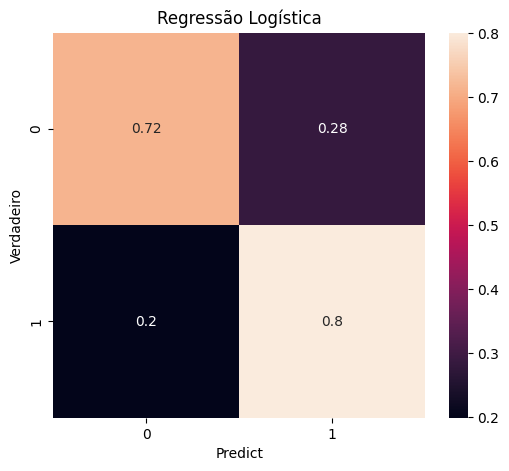

In [54]:
#Modelo de Regressão Logística final
lr = LogisticRegression(C=0.1, solver='lbfgs', max_iter=10)
lr.fit(x28_train_bal, y28_train_bal)

#Fazendo a previsão
y_pred_lr = lr.predict(x28_test)
y_pred_proba_lr = lr.predict_proba(x28_test)

#Classification report e AUC
print(classification_report(y28_test, y_pred_lr))
print(f'AUC: {roc_auc_score(y28_test, y_pred_lr):.3f}\n')

#Matriz de correlação
matriz_corr_lr = confusion_matrix(y28_test, y_pred_lr, normalize='true')
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(matriz_corr_lr, annot=True, ax=ax)
ax.set_title('Regressão Logística')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predict')
plt.show()

Um modelo que obteve um resultado mediano, atingindo um **recall para o Verdadeiros Positivos de 80%**. Continuaremos com os outros modelos, e no final iremos fazer uma comparação entre eles.

#### XGBoost

Os seguintes parâmetros serão tunados:

* **Learning_rate** - Controla a contribuição de cada árvore para a previsão final. Um valor menor torna o modelo mais robusto, mas pode aumentar o número de árvores necessárias para um desempenho ideal.
* **N_estimator** - O número de árvores de decisão criadas pelo XGBoost. Um valor mais alto pode melhorar a performance, mas também aumenta o tempo de treinamento.
* **Max_depth** - Controla a profundidade máxima das árvores de decisão. Um valor maior pode levar ao overfitting, enquanto um valor menor pode resultar em underfitting.
* **Min_child_weight** - Define o peso mínimo necessário para criar um novo nó em uma árvore. Isso afeta a divisão de nós durante a construção da árvore.
* **Gamma** - Um valor que controla se um nó será dividido com base em uma redução na função de perda que ocorre. Ele atua como um parâmetro de regularização para evitar overfitting.

In [55]:
xgb = XGBClassifier()

#Pegando os hyperparâmetros que serão passados para o Grid Search
param_grid = {
 'learning_rate': [0.001, 0.001, 0.01, 0.1]
}

#Identificar melhor parâmetro
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

#Ver resultados
print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, xgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.749 %
Após o ajuste: 0.812 % para {'learning_rate': 0.01}


In [56]:
xgb = XGBClassifier(learning_rate=0.001)

param_grid = {
 'n_estimators': range(0, 200, 50),
}

grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, xgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.778 %
Após o ajuste: 1.000 % para {'n_estimators': 0}


In [57]:
xgb = XGBClassifier(learning_rate=0.001, n_estimators=100)

param_grid = {
 'max_depth': range(1, 8, 1),
 'min_child_weight': range(1, 5, 1)
}

grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, xgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.778 %
Após o ajuste: 0.887 % para {'max_depth': 1, 'min_child_weight': 1}


In [58]:
xgb = XGBClassifier(learning_rate=0.001, n_estimators=100, max_depth=1, min_child_weight=1)

param_grid = {
  'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, xgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.887 %
Após o ajuste: 0.887 % para {'gamma': 0.0}


Nas células acima encontrei quais são os melhores valores para os hyperparâmetros selecionados. E agora com esses valores, irei construir nosso modelo final utilizando nossos dados de teste, e enfim descobrirmos o quão bom é o nosso modelo.

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1294
           1       0.43      0.88      0.57       467

    accuracy                           0.65      1761
   macro avg       0.68      0.73      0.64      1761
weighted avg       0.80      0.65      0.67      1761

AUC: 0.7252



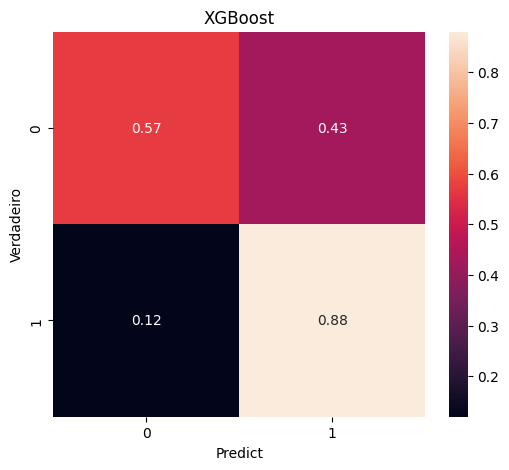

In [59]:
#Modelo XGBoost final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=100, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(x28_train_bal, y28_train_bal)

#Fazendo as previsões
y_pred_xgb = xgb.predict(x28_test)
y_pred_proba_xgb = xgb.predict_proba(x28_test)

#Classification report e AUC
print(classification_report(y28_test, y_pred_xgb))
print("AUC: {:.4f}\n".format(roc_auc_score(y28_test, y_pred_xgb)))

#Matriz de correlação
matriz_corr_xgb = confusion_matrix(y28_test, y_pred_xgb, normalize='true')
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(matriz_corr_xgb, annot=True, ax=ax)
ax.set_title('XGBoost')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predict')
plt.show()

Podemos perceber que antes de turnarmos os hyperparâmetros obtemos um recall de 75%, e **após o tunning obtemos um recall de 88%**. Sem dúvidas foi um resultado excelente, conseguimos melhorar nosso resultado em 13% e exatamente isso que era o esperado.

#### CatBoostClassifier
Os seguintes parâmetros serão tunados:
* Iterations - Número máximo de iterações (trees) a serem treinadas.
* Learning_rate - A taxa de aprendizado.
* Depth - A profundidade máxima das árvores de decisão. Controla a complexidade do modelo e pode evitar overfitting.

In [60]:
cat = CatBoostClassifier(verbose=0)

#Pegando os hyperparâmetros que serão passados para o Grid Search
param_grid = {
    'iterations': range(0, 100, 10),
}

#Identificar melhor parâmetro
grid_search = GridSearchCV(cat, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x10_train_bal, y10_train_bal)

#Ver resultados
print('Anterior ao ajuste: {:.3f} %'.format(val_model(x10_train_bal, y10_train_bal, cat)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.785 %
Após o ajuste: 0.795 % para {'iterations': 70}


In [61]:
cat = CatBoostClassifier(verbose=0, iterations=70)

param_grid = {
    'depth': range(1, 10, 1)
}

grid_search = GridSearchCV(cat, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x10_train_bal, y10_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x10_train_bal, y10_train_bal, cat)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.795 %
Após o ajuste: 0.810 % para {'depth': 1}


In [62]:
cat = CatBoostClassifier(verbose=0, iterations=70, depth=1)

param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01, 1]
}

grid_search = GridSearchCV(cat, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x10_train_bal, y10_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x10_train_bal, y10_train_bal, cat)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

Anterior ao ajuste: 0.804 %
Após o ajuste: 0.878 % para {'learning_rate': 0.0001}


Assim como no XGBoost, após escolhermos os melhores valores para os hyperparâmetros...conseguimos melhor e muito o recall do nosso modelo CatBoost, agora vamos para o modelo final.

              precision    recall  f1-score   support

           0       0.94      0.56      0.70      1294
           1       0.43      0.91      0.58       467

    accuracy                           0.65      1761
   macro avg       0.69      0.73      0.64      1761
weighted avg       0.81      0.65      0.67      1761

AUC: 0.7349



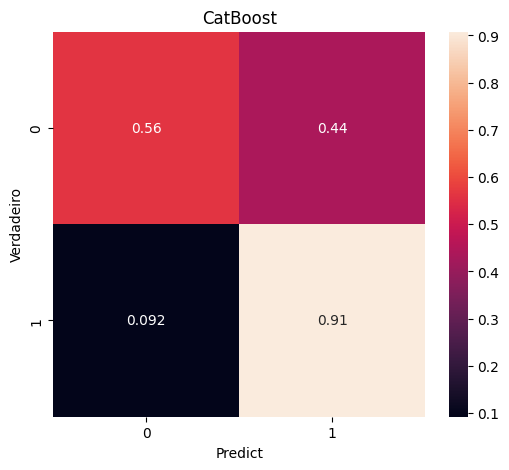

In [63]:
#Modelo CatBoost final
cat = CatBoostClassifier(verbose=0, iterations=70, depth=1, learning_rate=0.0001)
cat.fit(x10_train_bal, y10_train_bal)

#Fazendo as previsões
y_pred_cat = cat.predict(x10_test)
y_proba_cat = cat.predict_proba(x10_test)

#Classification report e AUC
print(classification_report(y10_test, y_pred_cat))
print("AUC: {:.4f}\n".format(roc_auc_score(y10_test, y_pred_cat)))

#Matriz de Correlação
matriz_corr_cat = confusion_matrix(y10_test, y_pred_cat, normalize='true')
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(matriz_corr_cat, annot=True, ax=ax)
ax.set_title('CatBoost')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predict')
plt.show()

Até então o CatBoost foi o melhor modelo. Antes de definirmos qualquer parâmetro, ele estava apresentando um resultado de 78% e após todas as tunagens, apresentou uma melhora de 9%. E após aplicar o modelo final, **conseguimos um recall de 91%**, que foi o melhor até agora.

Vamos para o último modelo.

#### LGBMClassifier
Os seguintes parâmetros serão tunados:

`Learning_rate`, `n_estimators`, `max_depth` e `min_child_samples` já utilizamos nos modelos acima.


In [64]:
lgb = LGBMClassifier()

#Pegando os hyperparâmetros que serão passados para o Grid Search
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01, 1]
}

#Identificar melhor parâmetro
grid_search = GridSearchCV(lgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

#Ver resultados
print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, lgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

[LightGBM] [Info] Number of positive: 1402, number of negative: 1402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2804, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1122, number of negative: 1121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500223 -> initscore=0.000892
[L

In [65]:
lgb = LGBMClassifier(learning_rate=0.01)

param_grid = {
    'n_estimators': range(0, 150, 10)
}

grid_search = GridSearchCV(lgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, lgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

[LightGBM] [Info] Number of positive: 1402, number of negative: 1402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2804, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1122, number of negative: 1121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500223 -> initscore=0.000892
[L

In [66]:
lgb = LGBMClassifier(learning_rate=0.01, n_estimators=110)

param_grid = {
     'max_depth': range(1, 8, 1),
     'min_child_samples': range(1, 5, 1),
}

grid_search = GridSearchCV(lgb, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(x28_train_bal, y28_train_bal)

print('Anterior ao ajuste: {:.3f} %'.format(val_model(x28_train_bal, y28_train_bal, lgb)))
print("Após o ajuste: {:.3f} % para {}".format(grid_result.best_score_, grid_result.best_params_))

[LightGBM] [Info] Number of positive: 1402, number of negative: 1402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2804, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[LightGBM] [Info] Number of positive: 1402, number of negative: 1402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2804, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

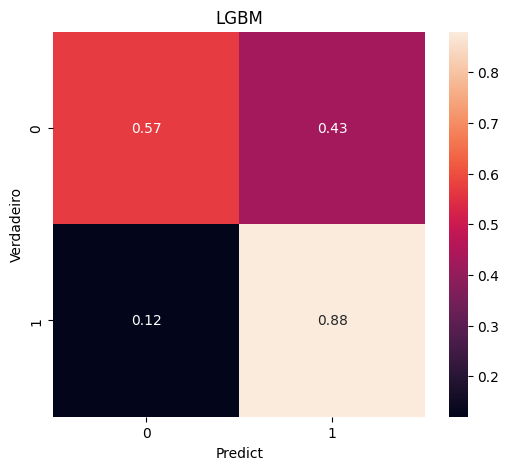

In [67]:
#Modelo LGBM final
lgbm = LGBMClassifier(learning_rate=0.01, n_estimators=110, max_depth=1, min_child_samples=1)
lgbm.fit(x28_train_bal, y28_train_bal)

#Fazendo as previsões
y_pred_lgbm = lgbm.predict(x28_test)
y_proba_lgbm = lgbm.predict_proba(x28_test)

print(classification_report(y28_test, y_pred_lgbm))
print("AUC: {:.4f}\n".format(roc_auc_score(y28_test, y_pred_lgbm)))

matriz_corr_lgbm = confusion_matrix(y28_test, y_pred_lgbm, normalize='true')
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(matriz_corr_lgbm, annot=True, ax=ax)
ax.set_title('LGBM')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predict')
plt.show()

Após o tuning de nosso parâmetros, **conseguimos obter um resultado de 88% de recall**, o que é um resultado muito bom para o nosso modelo.

A seguir, irei fazer o resumo sobre os modelos e apresentar qual foi o melhor e o por que disso.

## Sobre os Modelos de Machine Learning

Antes de começar a apresentar os resultados finais dos modelos, gostaria de falar um pouco sobre cada um que foi escolhido para ser utilizado(tuning) no projeto:
* `Regressão Logística` -  Ela usa a função logística para calcular a probabilidade de pertencer a uma categoria. É usada em classificações, onde examina as relações entre variáveis independentes e a probabilidade de um resultado ocorrer. É uma extensão da regressão linear, mas para dados categóricos.
* `XGBoost` - Ele constrói um conjunto de modelos de árvore em etapas sucessivas, focando nos erros passados para melhorar previsões futuras. O XGBoost é eficaz, rápido e lida bem com dados desbalanceados.
* `CatBoost` -  Ele otimiza automaticamente a codificação de recursos categóricos e usa estratégias como regularização e redução de sobreajuste. O CatBoost é eficiente, preciso e é uma escolha sólida especialmente quando os dados possuem características categóricas.
* `LGBM` -  Usando o método de busca por melhores splits em folhas, ele acelera o treinamento de árvores e lida bem com grandes conjuntos de dados. O LGBMClassifier é frequentemente escolhido para classificação devido à sua velocidade, alta precisão e capacidade de lidar com recursos categóricos.


Se observarmos, de todos os modelos que escolhi a Regressão Logística foi a que mais se distânciou dos resultados dos demais, e temos um motivo para isso.
**Para esse projeto, os algoritmos chamados de "Tradicionais" não se performaram nada bem comparados com os modelos de técnicas que chamamos de "Ensemble"**. E afinal o que é Ensemble?

#### Modelos Ensemble

Os modelos ensemble representam uma estratégia avançada no campo do aprendizado de máquina, destinada a melhorar a precisão e robustez das previsões. Essa abordagem envolve a combinação de múltiplos modelos individuais, permitindo que suas forças complementares compensem suas fraquezas individuais. O resultado é um modelo mais poderoso e geralmente mais confiável do que qualquer um dos modelos individuais.

Os modelos ensemble são altamente eficazes e versáteis, sendo amplamente empregados em diversas aplicações, desde classificação e regressão até detecção de anomalias e processamento de linguagem natural. Eles tendem a apresentar desempenho superior, especialmente quando os modelos individuais possuem vieses e fraquezas diferentes.

Eles funcionam da seguinte forma:

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Churn-Prediction-Telecomunicacoes/main/Ensemble.png" width="60%"></p>

No entanto, é importante lembrar que, embora poderosos, os modelos ensemble podem ser mais complexos e demorados de treinar do que modelos individuais. A seleção adequada de algoritmos base e ajustes finos(tuning) é essencial para obter os melhores resultados. Com a crescente acessibilidade computacional, os modelos ensemble continuam a ser uma ferramenta valiosa para melhorar a qualidade das previsões em uma ampla gama de cenários de aprendizado de máquina.

## Resultado final

Após escolhermos os 4 modelos, nós partimos para a tunagem dos hyperparâmetros e utilizamos nossos dados de teste para obtermos um resultado concreto para cada algoritmo. E como dito no começo da seção de Machine Learning, a métrica que iremos utilizar para nos basear se um modelo está bom seria o recall.

Essa métrica mede a capacidade do modelo em identificar corretamente todos os exemplos positivos da classe em relação ao total de exemplos positivos existentes no conjunto de dados. Em outras palavras, ele responde à pergunta: "De todos os casos verdadeiramente positivos, quantos o modelo conseguiu identificar?"

Vamos criar um gráfico para podermos ver qual modelo se performou melhor:

In [68]:
#Montando as listas
models = [lr, xgb, lgbm]
test_recalls = []
name_models = ['Regressão Logística', 'XGBoost', 'LGBM', 'CatBoost']

#Criando uma iteração para pegar o recall
for model in models:
    model.fit(x28_train_bal, y28_train_bal)

    y_test_pred = model.predict(x28_test)
    test_recall = recall_score(y28_test, y_test_pred)
    test_recalls.append(test_recall)

#Pegando o recall para o modelo que treinei com 10 features
test_recall = recall_score(y10_test, y_pred_cat)
test_recalls.append(test_recall)

[LightGBM] [Info] Number of positive: 1402, number of negative: 1402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2804, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

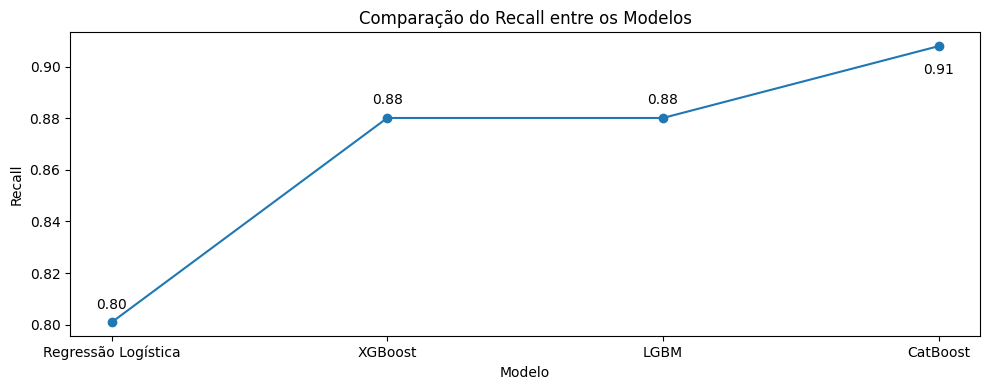

In [69]:
#Criando o Gráfico
plt.figure(figsize=(10, 4))
plt.plot(name_models, test_recalls, label='Teste', marker='o')
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.title('Comparação do Recall entre os Modelos')

#Mostrando os valores
max_recall_index = test_recalls.index(max(test_recalls))
for i, recall in enumerate(test_recalls):
    if i != max_recall_index:
        plt.annotate(f'{recall:.2f}', (name_models[i], recall), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        plt.annotate(f'{recall:.2f}', (name_models[i], recall), textcoords="offset points", xytext=(0,-20), ha='center')

plt.tight_layout()
plt.show()

Podemos chegar na conclusão de que após todo o trabalho de pré processamento dos dados, escolha de modelo e tunagem de Hyperparâmetro que **o melhor modelo para esse projeto foi o `CatBoost`, atingindo um incrível recall de 91%**.

Os demais modelos acabaram se saindo bem também, sendo que o XGBoost e o LGBM atingiram o mesmo resultado, e a Regressão Logística obteve um resultado um pouco menor neste projeto por não ser um modelo Ensemble e não ter se performado tão bem com os dados.

`Então é por isso que o modelo CatBoostClassifier foi o melhor para o projeto de Churn!`

## Conclusão

Agora, nossas conclusões finais sobre o projeto de Churn Predict:

* Começamos apresentando qual era o problema de negócio e qual seria a finalidade de nosso projeto. Depois partimos para a aquisição e análise exploratória, onde foi possível ver o tipo de dados, se existiam valores ausentes, identificar outliers, ver o desbalanceamento de classes e criar uma matriz de correlação.

* Logo após essa parte das análises fui para a parte de preparação dos dados, onde os deixei o mais refinados possíveis para a construção do nosso modelo de inteligência artificial. E essas etapas consistiam em Codificação de Variáveis, Feature Engineering, Feature Selection, Separação dos Dados entre Treino e Teste, Feature Scaling e o Balanceamento de classes, todas essas etapas apenas para deixar nossos dados adequados para os algoritmos.

* Enfim chegamos na parte em que iriamos testar alguns modelos de Machine Learning, e para isso escolhi a métrica "Recall" que mede a taxa de Verdadeiros Positivos corretos, e então escolhi 9 modelos de Classificação para testar: Regressão Logística, SGDC, SVC, Decision Tree, Random Forest, KNN, XGBoost, LGBM e CatBoost. Montei uma tabela com o recall de cada um, para as 10, 15 features mais importantes e para todas as features(28). E após isso escolhi os 4 melhores modelos, que foram: Regressão Logística, LGBM, Catboost e Xgboost.

* Depois de escolher esses modelos parti para a parte que acredito ter sido a mais demorada, a parte de Tunagem dos Hyperparâmetros. Esta é uma parte crucial para obter o melhor desempenho do modelo, porém costuma ter uma complexidade computacional muito elevada, por isso acaba sendo um pouco mais demorada. Mas o fizemos, e conseguimos melhorar o resultado de todos os nossos algoritmos.

* E para finalizar, montei o modelo final com os melhores valores para os parâmetros escolhidos e apliquei os dados de teste que ainda não haviam sido vistos pelo nosso modelo. Logo após isso parti para um leve explicação dos algoritmos e de uma técnica chamada "Ensemble". Após obter o resultado de cada um, montei um gráfico para exibir qual foi o melhor desempenho. E ao final de tudo, **o modelo que melhor se desempenhou foi o CatBoost atingindo um recall de 91% e é por isso que ele foi escolhido para este projeto**.

### Pipeline + Salvar Modelo

Nosso próximo passo será estruturar todas as transformações que fizemos até treinar nosso modelo em um pipeline compacto e eficiente, e então aplicar o treinamento ao modelo e hiperparâmetros que escolhemos novamente, pois dessa forma iremos conseguir salvar nosso modelo com um pipeline e então poderemos construir uma API para servir nosso modelo em produção para fazer previsões reais.



In [ ]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# 1. Função de Tradução + Feature Engineering
def transformacoes_api(df):
    df = df.copy()

    # Mapeamento Sim/Não → numérico
    mapa = {'Sim': 1, 'Não': 0, 'sim': 1, 'não': 0, 'nao': 0}

    servicos = [
        'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

    # Criação de colunas temporárias para cálculo de engajamento
    for col in servicos:
        if col in df.columns:
            df[f"{col}_temp"] = df[col].map(mapa).fillna(0)

    # Novas features
    df["Engajamento"] = df[ [f"{c}_temp" for c in servicos if f"{c}_temp" in df.columns] ].sum(axis=1)

    df["InteracaoCharges"] = (pd.to_numeric(df["MonthlyCharges"]) * pd.to_numeric(df["TotalCharges"]))

    # Limpeza das colunas temporárias
    cols_to_drop = [f"{c}_temp" for c in servicos if f"{c}_temp" in df.columns]
    return df.drop(columns=cols_to_drop)

feature_engineering = FunctionTransformer(transformacoes_api)

# 2. Pré-processamento
features_numerical = ["tenure", "MonthlyCharges", "TotalCharges", "InteracaoCharges", "Engajamento"]

features_categorical = ["gender", "Partner", "Contract", "PaymentMethod", "InternetService"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features_numerical),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), features_categorical),
    ],
    remainder="drop"
)

# 3. Pipeline Final
pipeline = Pipeline(steps=[
    ("feature_engineering", feature_engineering),
    ("preprocess", preprocess),
    ("model", CatBoostClassifier(verbose=0, iterations=70, depth=1, learning_rate=0.0001))])

# 4. Preparação dos dados
df_pt = df_clean.copy()

mapeamento_global = { "Yes": "Sim", "No": "Não", "Female": "Feminino", "Male": "Masculino"}

df_pt = df_pt.replace(mapeamento_global)

X = df_pt.drop("Churn", axis=1)
y = df_pt["Churn"].map({"Sim": 1, "Não": 0}).values


# 5. Split + Balanceamento
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)
rus = RandomUnderSampler(random_state=40)
x_train_bal, y_train_bal = rus.fit_resample(x_train, y_train)

# 6. Treinamento
pipeline.fit(x_train_bal, y_train_bal)

# 7. Salvando o Modelo + Pipeline
joblib.dump(pipeline, "models/churn_pipeline.joblib")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
[ 'InteracaoCharges 2'
 ' 1' '  1' 'Engajamento 2'
 '1' ' 1' ' 1']